<a href="https://colab.research.google.com/github/leswlz/Data-Analysis-with-Python/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib import dates as mpl_dates

list_month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = "date", parse_dates = True)

# Clean data
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
f25 = df['value'] <= df['value'].quantile(0.025)
f75 = df['value'] >= df['value'].quantile(0.975)
cond = (f25 | f75)
df = df.drop(index = df[cond].index)

def draw_line_plot():
    # Draw line plot    
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(14)

    ax.plot_date(df.index, df['value'], linestyle = "solid", marker = None, color = "red")
    
    # The label on the x axis should be "Date" and the label on the y axis should be "Page Views"
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')   
    # The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(6 * 30)) 
    date_format = mpl_dates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_format)

def draw_bar_plot():
    # It should show average daily page views for each month grouped by year
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['Month'] = df_bar.index.strftime('%B')
    df_grp = df_bar.groupby(['year', 'Month'])
    df_grp['value'].apply(lambda x: x.mean())

    # Draw bar plot  
    sns.set_style("ticks")
    g = sns.catplot(x = "year", kind = "bar", hue = "Month", y = "value", data = df_bar, hue_order = list_month,
                    ci = None, legend = False, palette = "hls")  

    fig = g.fig
    ax = g.ax

    # On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper left', title = "Month")
    plt.setp(ax.get_legend().get_texts(), fontsize = '8')
    plt.setp(ax.get_legend().get_title(), fontsize = '8')
    plt.tight_layout()

def fixed_boxplot(*args, label = None, **kwargs):
    sns.boxplot(*args, **kwargs, labels = [label])

def draw_box_plot():
    # These box plots should show how the values are distributed within a given year or month and how it compares over time. 
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace = True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box.sort_values(by = ['year', 'date'], ascending = [False, True], inplace = True)

    # Draw box plots (using Seaborn)
    df_box["Page Views"] = df_box["value"]
    df_box["Month"] = df_box["month"]
    df_box["Year"] = df_box["year"]

    g = sns.PairGrid(df_box, y_vars = ["Page Views"], x_vars = ["Year", "Month"], palette = "hls")
    g.map(fixed_boxplot)
    fig = g.fig
    fig.set_figheight(6)
    fig.set_figwidth(16)

    fig.axes[0].set_ylabel('Page Views')
    fig.axes[1].set_ylabel('Page Views')
    
    # The title of the first chart should be "Year-wise Box Plot (Trend)"
    fig.axes[0].set_title('Year-wise Box Plot (Trend)')
    # and the title of the second chart should be "Month-wise Box Plot (Seasonality)"
    fig.axes[1].set_title('Month-wise Box Plot (Seasonality)')
    plt.tight_layout()


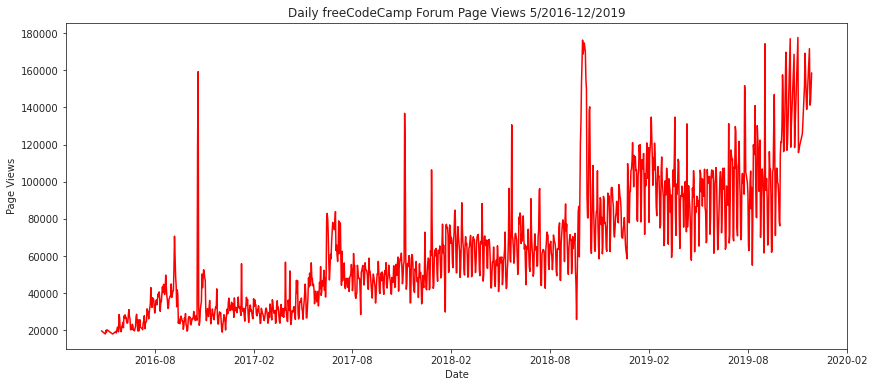

In [46]:
draw_line_plot()

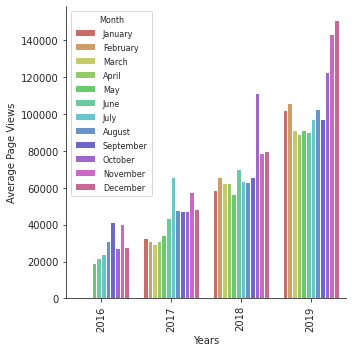

In [47]:
draw_bar_plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


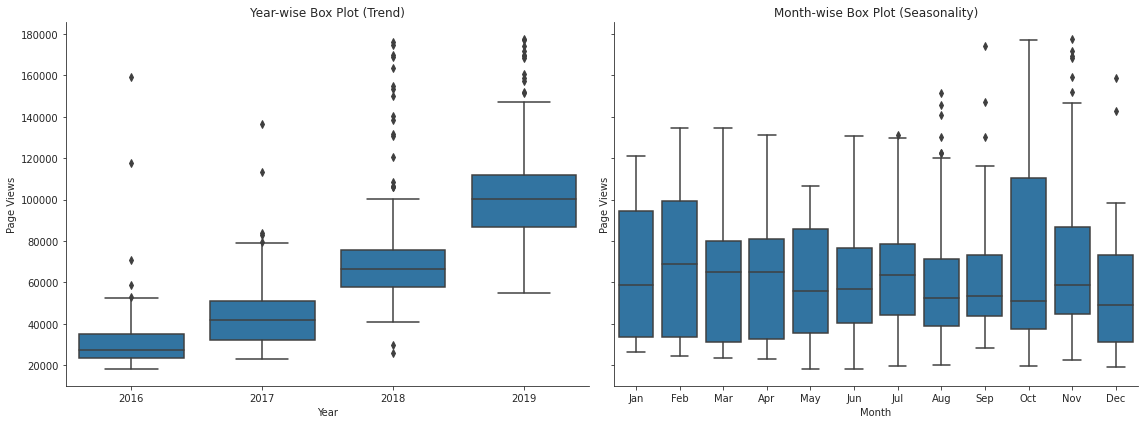

In [48]:
draw_box_plot()